In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import math

In [3]:
train1 = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/train_new.csv", index_col=0)
test1 = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/test_new.csv", index_col=0)

In [4]:
train2 = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/train.csv", index_col=0)
test2 = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/test.csv", index_col=0)

In [5]:
train10 = train1[train1["is_claim"] == 0].sample(1000, random_state=42)
train11 = train1[train1["is_claim"] == 1].sample(500, random_state=42)
train_new1 = pd.concat([train10, train11], ignore_index=False)
train_new1 = train_new1.sample(frac=1, random_state=42, ignore_index=False)

In [6]:
train20 = train2[train2["is_claim"] == 0].sample(1000, random_state=42)
train21 = train2[train2["is_claim"] == 1].sample(500, random_state=42)
train_new2 = pd.concat([train20, train21], ignore_index=False)
train_new2 = train_new2.sample(frac=1, random_state=42, ignore_index=False)

In [7]:
x_train1 = train_new1.drop(["is_claim"], axis="columns")
y_train1 = train_new1["is_claim"]

In [8]:
class LinearClassifier:
    def __init__(self, learning_rate=0.001, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.W = 0
        self.b = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_weights_and_bias(self, num_of_feature):
      self.W = np.full((1, num_of_feature),0.01)
      self.b = 0.0
      return self.W, self.b

    def forward_backward_propagation(self, x_train, y_train):
      num_of_feature = x_train.shape[1]
      self.W, self.b = self.initialize_weights_and_bias(num_of_feature)
      y = np.dot(self.W, x_train.T) + self.b
      y_head = self.sigmoid(y)
      loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))
      cost = (np.sum(loss)) / (-x_train.shape[0])

      #Backward Propogation
      derivative_weight = (np.dot((y_head[0]-y_train),(x_train)))/x_train.shape[0]
      derivative_bias = np.sum(y_head[0]-y_train)/x_train.shape[0]
      gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
      return cost, gradients

    def fit(self, x_train, y_train):
        cost_list = []
        index = []

        for i in range(self.num_iterations):
            cost, gradients = self.forward_backward_propagation(x_train, y_train)
            cost_list.append(cost)
            index.append(i)
            self.W = self.W - self.learning_rate * gradients["derivative_weight"]
            self.b = self.b - self.learning_rate * gradients["derivative_bias"]

            if i % 10 == 0:
                print("Cost after iteration %i: %f" % (i, cost))

        parameters = {"Weight": self.W, "Bias": self.b}
        plt.plot(index, cost_list)
        plt.xticks(index, rotation='vertical')
        plt.xlabel("Number of Iteration")
        plt.ylabel("Cost")
        plt.show()
        return parameters, gradients, cost_list

    def predict(self, x_test):
        y = self.sigmoid(np.dot(self.W, x_test.T) + self.b)
        y_pred = np.zeros((1, x_test.shape[0]))

        for i in range(y.shape[0]):
            if y[0, i] < 0.5:
                y_pred[0, i] = 0
            else:
                y_pred[0, i] = 1

        return y_pred

In [9]:
class KNN_euclidean:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        k_neighbors_indices = np.argsort(distances)[:self.k]

        k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]

        most_common = np.bincount(k_neighbor_labels).argmax()
        return most_common

    def euclidean_distance(self, p, q):
        temp = (p - q)**2
        euclidean_distance = np.sqrt(temp.sum())
        return euclidean_distance

    def score(self, y_true, y_pred):
      accuracy = 0
      for i in range(y_true.shape[0]):
        if y_true[i] == y_pred[i]:
          accuracy = accuracy + 1
      accuracy = (accuracy/y_true.shape[0])*100
      print("Test Accuracy = ",accuracy, "%")

class KNN_manhattan:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.manhattan_distance(x, x_train) for x_train in self.X_train]

        k_neighbors_indices = np.argsort(distances)[:self.k]

        k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]

        most_common = np.bincount(k_neighbor_labels).argmax()
        return most_common

    def manhattan_distance(self, p, q):
      manhattan_distance = np.sum(np.abs(p-q))
      return manhattan_distance

    def score(self, y_true, y_pred):
      accuracy = 0
      for i in range(y_true.shape[0]):
        if y_true[i] == y_pred[i]:
          accuracy = accuracy + 1
      accuracy = (accuracy/y_true.shape[0])*100
      print("Test Accuracy = ",accuracy, "%")

class KNN_chebyshev:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [self.chebyshev_distance(x, x_train) for x_train in self.X_train]

        k_neighbors_indices = np.argsort(distances)[:self.k]

        k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]

        most_common = np.bincount(k_neighbor_labels).argmax()
        return most_common

    def chebyshev_distance(self, p, q):
      chebyshev_distance = np.max(np.abs(p-q))
      return chebyshev_distance

    def score(self, y_true, y_pred):
      accuracy = 0
      for i in range(y_true.shape[0]):
        if y_true[i] == y_pred[i]:
          accuracy = accuracy + 1
      accuracy = (accuracy/y_true.shape[0])*100
      print("Test Accuracy = ",accuracy, "%")

In [10]:
def unique_vals(rows, col):
    return set([row[col] for row in rows])


def class_counts(rows):
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts


def max_label(dict):
    max_count = 0
    label = ""

    for key, value in dict.items():
        if dict[key] > max_count:
            max_count = dict[key]
            label = key

    return label


def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)


class Question:
    def __init__(self, column, value, header):
        self.column = column
        self.value = value
        self.header = header

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            self.header[self.column], condition, str(self.value))


def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity


def entropy(rows):
    entries = class_counts(rows)
    avg_entropy = 0
    size = float(len(rows))
    for label in entries:
        prob = entries[label] / size
        avg_entropy = avg_entropy + (prob * math.log(prob, 2))
    return -1*avg_entropy


def information_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))

    return current_uncertainty - p * entropy(left) - (1 - p) * entropy(right)

def find_best_split(rows, header):
    best_gain = 0
    best_question = None
    current_uncertainty = entropy(rows)
    n_features = len(rows[0]) - 1

    for col in range(n_features):
        values = set([row[col] for row in rows])
        for val in values:
            question = Question(col, val, header)
            true_rows, false_rows = partition(rows, question)
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            gain = information_gain(true_rows, false_rows, current_uncertainty)
            if gain > best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question


class Leaf:
    def __init__(self, rows, id, depth):
        self.predictions = class_counts(rows)
        self.predicted_label = max_label(self.predictions)
        self.id = id
        self.depth = depth


class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch,
                 depth,
                 id,
                 rows):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.depth = depth
        self.id = id
        self.rows = rows


def build_tree(rows, header, depth=0, id=0):
    gain, question = find_best_split(rows, header)
    if gain == 0:
        return Leaf(rows, id, depth)

    true_rows, false_rows = partition(rows, question)

    true_branch = build_tree(true_rows, header, depth + 1, 2 * id + 2)

    false_branch = build_tree(false_rows, header, depth + 1, 2 * id + 1)

    return Decision_Node(question, true_branch, false_branch, depth, id, rows)


def prune_tree(node, prunedList):
    if isinstance(node, Leaf):
        return node

    if int(node.id) in prunedList:
        return Leaf(node.rows, node.id, node.depth)

    node.true_branch = prune_tree(node.true_branch, prunedList)

    node.false_branch = prune_tree(node.false_branch, prunedList)

    return node


def classify(row, node):
    if isinstance(node, Leaf):
        return node.predicted_label
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)


def print_tree(node, spacing=""):
    if isinstance(node, Leaf):
        print(spacing + "Leaf id: " + str(node.id) + " Predictions: " + str(node.predictions) + " Label Class: " + str(node.predicted_label))
        return

    print(spacing + str(node.question) + " id: " + str(node.id) + " depth: " + str(node.depth))

    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")


def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


def getLeafNodes(node, leafNodes =[]):
    if isinstance(node, Leaf):
        leafNodes.append(node)
        return

    getLeafNodes(node.true_branch, leafNodes)

    getLeafNodes(node.false_branch, leafNodes)

    return leafNodes


def getInnerNodes(node, innerNodes =[]):

    if isinstance(node, Leaf):
        return

    innerNodes.append(node)

    getInnerNodes(node.true_branch, innerNodes)

    getInnerNodes(node.false_branch, innerNodes)

    return innerNodes


def computeAccuracy(rows, node):

    count = len(rows)
    if count == 0:
        return 0

    accuracy = 0
    for row in rows:
        if row[-1] == classify(row, node):
            accuracy += 1
    return round(accuracy/count, 2)

In [11]:
class Leaf:
    def __init__(self, rows, id, depth):
        self.predictions = class_counts(rows)
        self.predicted_label = max_label(self.predictions)
        self.id = id
        self.depth = depth

class Decision_Node:
    def __init__(self, question, true_branch, false_branch, depth):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.depth = depth

class Question:
    def __init__(self, column, value, header):
        self.column = column
        self.value = value
        self.header = header

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            self.header[self.column], condition, str(self.value))

class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X_train, y_train):
        data = np.column_stack((X_train, y_train))
        header = list(range(X_train.shape[1])) + ["label"]
        self.tree = self.build_tree(data, header, depth=0)

    def predict(self, X_test):
        predictions = []
        for example in X_test:
            predictions.append(self.classify(example, self.tree))
        return np.array(predictions)

    def unique_vals(self, rows, col):
        return set(row[col] for row in rows)

    def class_counts(self, rows):
        counts = {}
        for row in rows:
            label = row[-1]
            if label not in counts:
                counts[label] = 0
            counts[label] += 1
        return counts

    def gini(self, rows):
        counts = self.class_counts(rows)
        impurity = 1
        for lbl in counts:
            prob_of_lbl = counts[lbl] / float(len(rows))
            impurity -= prob_of_lbl**2
        return impurity

    def information_gain(self, left, right, current_uncertainty):
        p = float(len(left)) / (len(left) + len(right))
        return current_uncertainty - p * self.gini(left) - (1 - p) * self.gini(right)

    def is_numeric(self, value):
        return isinstance(value, int) or isinstance(value, float)

    def partition(self, rows, question):
        true_rows, false_rows = [], []
        for row in rows:
            if question.match(row):
                true_rows.append(row)
            else:
                false_rows.append(row)
        return true_rows, false_rows

    def build_tree(self, rows, header, depth=0):
      if self.max_depth is not None and depth >= self.max_depth:
        return self.leaf_node(rows, depth)

      gain, question = self.find_best_split(rows, header)

      if gain == 0:
        return self.leaf_node(rows, depth)

      true_rows, false_rows = self.partition(rows, question)

      true_branch = self.build_tree(true_rows, header, depth + 1)
      false_branch = self.build_tree(false_rows, header, depth + 1)

      return Decision_Node(question, true_branch, false_branch, depth)


    def find_best_split(self, rows, header):
        best_gain = 0
        best_question = None
        current_uncertainty = self.gini(rows)
        n_features = len(rows[0]) - 1

        for col in range(n_features):
            values = self.unique_vals(rows, col)
            for val in values:
                question = Question(col, val, header)
                true_rows, false_rows = self.partition(rows, question)
                if len(true_rows) == 0 or len(false_rows) == 0:
                    continue

                gain = self.information_gain(true_rows, false_rows, current_uncertainty)
                if gain > best_gain:
                    best_gain, best_question = gain, question

        return best_gain, best_question

    def classify(self, example, node):
        if isinstance(node, Leaf):
            return node.predicted_label
        if node.question.match(example):
            return self.classify(example, node.true_branch)
        else:
            return self.classify(example, node.false_branch)

    def leaf_node(self, rows, depth):
      return Leaf(rows, id=0, depth=depth)

In [12]:
class KFoldCrossValidation:
    def __init__(self, k):
        self.k = k

    def split_data(self, X, y):
        fold_size = len(X) // self.k
        indices = np.arange(len(X))
        np.random.shuffle(indices)

        for i in range(0, len(indices), fold_size):
            test_indices = indices[i:i + fold_size]
            train_indices = np.concatenate([indices[:i], indices[i + fold_size:]])

            yield X[train_indices], y[train_indices], X[test_indices], y[test_indices]

def merge_predictions(predictions):
    # Combine predictions by taking the mean
    return np.mean(predictions, axis=0)

In [13]:
# Example usage
# Assume you have your X and y arrays
# X, y = ...

k = 5  # Number of folds
kf = KFold(n_splits=k)

linear_classifier = LinearClassifier(learning_rate=0.001, num_iterations=100)
knn_euclidean = KNN_euclidean(k=3)
knn_manhattan = KNN_manhattan(k=3)
knn_chebyshev = KNN_chebyshev(k=3)
decision_tree = DecisionTreeClassifier()

classifiers = [linear_classifier, knn_euclidean, knn_manhattan, knn_chebyshev, decision_tree]

1
Linear
Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


<ipython-input-8-f80a93cdc102>:21: RuntimeWarning: divide by zero encountered in log
  loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))
<ipython-input-8-f80a93cdc102>:21: RuntimeWarning: invalid value encountered in multiply
  loss = (y_train*np.log(y_head[0]))+((1-y_train)*np.log(1-y_head[0]))


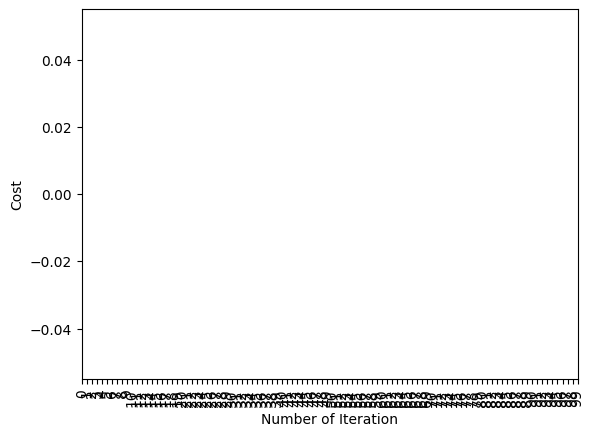

<ipython-input-8-f80a93cdc102>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Euclidean
Manhattan
Chebyshev
Decision Tree
2
Linear
Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


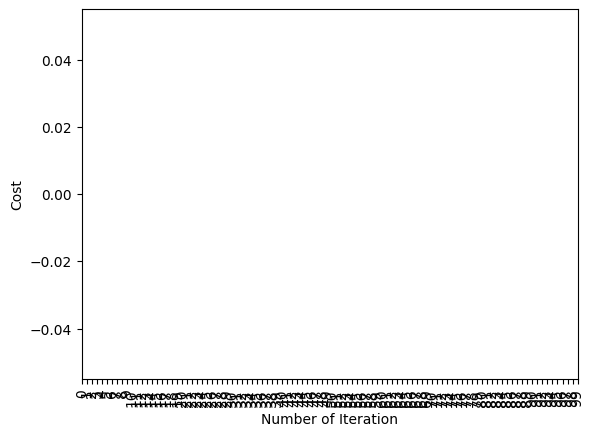

Euclidean
Manhattan
Chebyshev
Decision Tree
3
Linear
Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


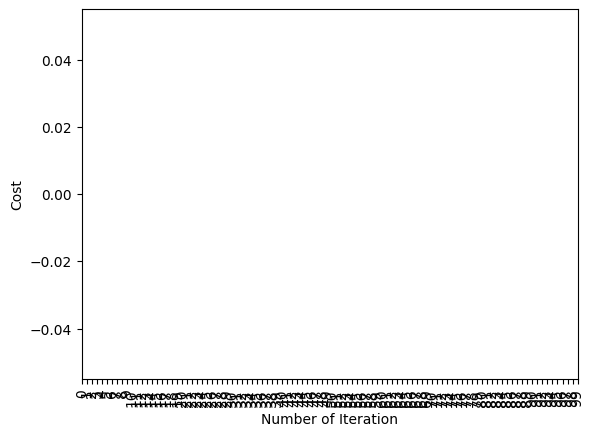

Euclidean
Manhattan
Chebyshev
Decision Tree
4
Linear
Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


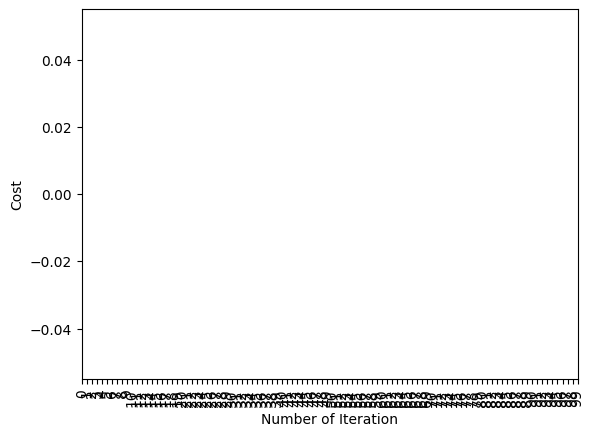

Euclidean
Manhattan
Chebyshev
Decision Tree
5
Linear
Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


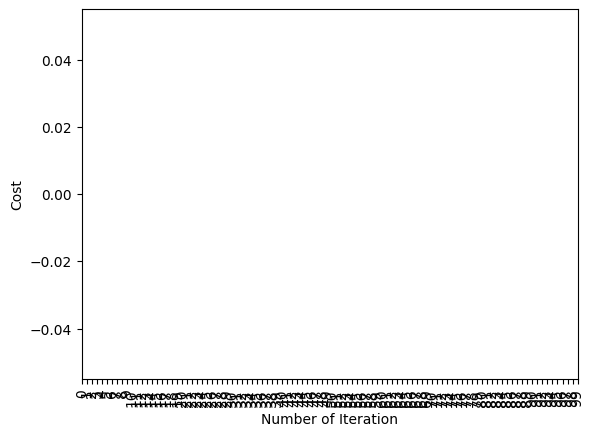

Euclidean
Manhattan
Chebyshev
Decision Tree


In [14]:
# Placeholder for predictions from each fold and each classifier
all_predictions = []

n = 0
for train_index, valid_index in kf.split(x_train1):
    fold_predictions = []
    n = n + 1
    print(n)
    for classifier in classifiers:
      if classifier == linear_classifier:
        x_linear_train, x_linear_valid = x_train1.iloc[train_index], x_train1.iloc[valid_index]
        y_linear_train, y_linear_valid = y_train1[train_index], y_train1[valid_index]
        x_linear_train = np.array(x_linear_train)
        x_linear_valid = np.array(x_linear_valid)
        y_linear_train = np.array(y_linear_train)
        y_linear_valid = np.array(y_linear_valid)
        print("Linear")
        classifier.fit(x_linear_train, y_linear_train)
        y_pred = classifier.predict(x_linear_valid)
        fold_predictions.append(y_pred)

      elif classifier == knn_euclidean:
        x_knn_train, x_knn_valid = x_train1.iloc[train_index], x_train1.iloc[valid_index]
        y_knn_train, y_knn_valid = y_train1[train_index], y_train1[valid_index]
        x_knn_train = np.array(x_knn_train)
        x_knn_valid = np.array(x_knn_valid)
        y_knn_train = np.array(y_knn_train)
        y_knn_valid = np.array(y_knn_valid)
        print("Euclidean")
        classifier.fit(x_knn_train, y_knn_train)
        y_pred = classifier.predict(x_knn_valid)
        fold_predictions.append(y_pred)

      elif classifier == knn_manhattan:
        x_knn_train, x_knn_valid = x_train1.iloc[train_index], x_train1.iloc[valid_index]
        y_knn_train, y_knn_valid = y_train1[train_index], y_train1[valid_index]
        x_knn_train = np.array(x_knn_train)
        x_knn_valid = np.array(x_knn_valid)
        y_knn_train = np.array(y_knn_train)
        y_knn_valid = np.array(y_knn_valid)
        print("Manhattan")
        classifier.fit(x_knn_train, y_knn_train)
        y_pred = classifier.predict(x_knn_valid)
        fold_predictions.append(y_pred)

      elif classifier == knn_chebyshev:
        x_knn_train, x_knn_valid = x_train1.iloc[train_index], x_train1.iloc[valid_index]
        y_knn_train, y_knn_valid = y_train1[train_index], y_train1[valid_index]
        x_knn_train = np.array(x_knn_train)
        x_knn_valid = np.array(x_knn_valid)
        y_knn_train = np.array(y_knn_train)
        y_knn_valid = np.array(y_knn_valid)
        print("Chebyshev")
        classifier.fit(x_knn_train, y_knn_train)
        y_pred = classifier.predict(x_knn_valid)
        fold_predictions.append(y_pred)

      elif classifier == decision_tree:
        x_dt_train, x_dt_valid = x_train1.iloc[train_index], x_train1.iloc[valid_index]
        y_dt_train, y_dt_valid = y_train1[train_index], y_train1[valid_index]
        x_dt_train = np.array(x_dt_train)
        x_dt_valid = np.array(x_dt_valid)
        y_dt_train = np.array(y_dt_train)
        y_dt_valid = np.array(y_dt_valid)
        print("Decision Tree")
        classifier.fit(x_dt_train, y_dt_train)
        y_pred = classifier.predict(x_dt_valid)
        fold_predictions.append(y_pred)

      all_predictions.append(fold_predictions)

In [15]:
n = 0
for train_index, valid_index in kf.split(x_train1):
    fold_predictions = []
    n = n + 1
    print(n)
    print(valid_index)
    print("====================================================================")

1
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 

In [20]:
# Merge predictions from all folds and all classifiers
merged_predictions = merge_predictions(all_predictions)
merged_predictions

array([array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [17]:
final_prediction=[]
pos = 0
neg = 0
for i in range(5):
  for k in range(300):
    for j in range(5):
      if j == 0:
        if all_predictions[i][j][0][k] == 0:
          neg = neg +1
        elif all_predictions[i][j][0][k] == 1:
          pos = pos + 1
      else:
        if all_predictions[i][j][k] == 0:
          neg = neg +1
        elif all_predictions[i][j][k] == 1:
          pos = pos + 1
    if pos > neg:
      final_prediction.append(1)
    else:
      final_prediction.append(0)
    pos = 0
    neg = 0

In [18]:
def accuracy(y_true, y_pred):
  accuracy = 0
  for i in range(len(y_true)):
      if y_true[i] == y_pred[i]:
        accuracy = accuracy + 1
  accuracy = (accuracy/len(y_true))*100
  print("Test Accuracy = ",accuracy, "%")

In [19]:
y_true_train = list(y_train1)
accuracy(y_true_train, final_prediction)

Test Accuracy =  59.06666666666667 %


In [30]:
merge_final=[]
pos = 0
neg = 0
for i in range(5):
  for k in range(300):
    if i == 0:
      if merged_predictions[i][0][k] <= 0.5:
        neg = neg +1
      elif merged_predictions[i][0][k] > 0.5:
        pos = pos + 1
    else:
      if merged_predictions[i][k] <= 0.5:
        neg = neg +1
      elif merged_predictions[i][k] > 0.5:
        pos = pos + 1
    if pos > neg:
      merge_final.append(1)
    else:
      merge_final.append(0)
    pos = 0
    neg = 0

In [32]:
accuracy(y_true_train, merge_final)

Test Accuracy =  63.6 %
